In [127]:
# Step 0: data warehouse or lake-> store both raw and deduplicated data (in our case-> GitHub raw data)
# data quality -> units, data type mismatches, datetime or currency

# Step 1: read the data -> read in correct schema

# Step 2: Exploratory data analysis-> look and visualize your data!

# Step 3: check data for quality- missing or null values, outliers, data imbalance for classes
# FIXING-> treat outliers and missing values-> either replace them or remove them or ignore them

# replace-> central tendencies (mean, median, mode)
# remove-> del entire row or column

# Missing values -> Missing at random, missing completely at random, missing not at random

# random -> unknown or inference
# data is known/unknown at training, but unknown at inference with independency between them
# -> Missing completely at random

# data is knonw/unknown at training, but unknown at inference with depency on missingness
# -> missing at random

# data is unknown at training, but known at inference with either dependence or independence
# -> missing not at random


# REPLACEMENT is usually avoided unless you are the SME
# prefer REMOVING

# Step 4: Featue selection and feature engineering
# do we need all the columns?

#Usecase: Numerous financial institutions held the view that providing loans to individuals was a safe bet,
#  considering their solid credit ratings and the occasional support of collateral. However, the banking sector has recently observed a rise in the incidence of loan defaults,
#  meaning that borrowers are failing to make timely repayments. 
# Such defaults have a direct negative effect on the income of banks. In response to this trend, banks are now meticulously examining every loan application 
# to pinpoint potential instances of default. This allows them to forecast which borrowers might fail to fulfill their repayment obligations and at what stage in the process.

In [128]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/neha15sri/openAIJune24/main/Train_Dataset.csv')

C:\Users\XX569PS\AppData\Local\Temp\ipykernel_7384\3695137856.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/neha15sri/openAIJune24/main/Train_Dataset.csv')


In [129]:
data.tail(10)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
121846,12204389,12150,0.0,1.0,0.0,1.0,0.0,25470,1462.05,Alone,...,Yes,Yes,XNA,0.720885,NaN,NaN,0.0711,0.0,0.0,0
121847,12186941,15750,1.0,0.0,1.0,1.0,0.0,26128.8,1283.85,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.729825,0.441836,NaN,1175.0,1.0,0
121848,12110723,18000,1.0,1.0,0.0,0.0,1.0,27302.4,2169.9,Alone,...,Yes,Yes,Housing,NaN,0.625207,0.306202,NaN,1718.0,2.0,0
121849,12183464,10350,0.0,1.0,0.0,0.0,0.0,18792.9,1736.55,Alone,...,Yes,Yes,Self-employed,0.162760,0.621042,NaN,0.3340,774.0,NaN,0
121850,12136406,12150,0.0,0.0,1.0,0.0,0.0,78192,2383.65,Alone,...,Yes,Yes,XNA,NaN,0.678249,0.283712,0.0515,1581.0,2.0,0
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0
121855,12105610,9000,1.0,1.0,1.0,1.0,1.0,62428.95,4201.65,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.556414,0.298595,0.1031,805.0,0.0,0


In [130]:
# if we remove ID column, how do we know which row belongs to which patient?

# ID is needed, but SHOULD not participate in ML!

# set index-> as long as such as column has only unique values

data = data.set_index('ID')
data.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
ID,,,,,,,,,,,,,,,,,,,,,
12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [131]:
data.pop("Accompany_Client")
data.pop("Client_Education")
data.pop("Client_Housing_Type")
data.pop("Client_Occupation")
data.pop("Type_Organization")
data.pop("Client_Income_Type")
data.pop("Mobile_Tag")
data.pop("Homephone_Tag")
data.pop("Client_Permanent_Match_Tag")
data.pop("Client_Contact_Work_Tag")
data.pop("Application_Process_Day")
data.pop("Application_Process_Hour")
data.pop("Social_Circle_Default")
data.pop("Credit_Bureau")
data.pop("Score_Source_1")
data.pop("Score_Source_2")
data.pop("Score_Source_3")

ID
12142509         NaN
12138936         NaN
12181264    0.329655
12188929    0.631355
12133385    0.355639
              ...   
12207714    0.184116
12173765    0.406617
12103937         NaN
12170623    0.077499
12105610    0.298595
Name: Score_Source_3, Length: 121856, dtype: object

In [132]:
# always check for class imbalance
# class imbalance-> find all discrete columns in your dataset; (not continuous)
for col_name in data.columns:
  print(col_name, data[col_name].nunique())
# from this we can see that only diagnosis column seems discrete, others are continuous

Client_Income 1516
Car_Owned 2
Bike_Owned 2
Active_Loan 2
House_Own 2
Child_Count 14
Credit_Amount 6816
Loan_Annuity 16680
Client_Marital_Status 4
Client_Gender 3
Loan_Contract_Type 2
Population_Region_Relative 164
Age_Days 22583
Employed_Days 13220
Registration_Days 19254
ID_Days 9655
Own_House_Age 55
Workphone_Working 2
Client_Family_Members 15
Cleint_City_Rating 3
Phone_Change 3590
Default 2


In [133]:
# see the distribution of values!
data['Default'].value_counts()



Default
0    112011
1      9845
Name: count, dtype: int64

In [134]:
# FEATURE SELECTION
# Correlations
# directly proportional, inversely, not proportional
# positive, negative or ZERO correlation

# positive-> if i increase, you increase. If i decrease, you decrease
# negative-> if i increase, you decrease. If i decrease, you increase
# ZERO -> if i increase or decrease, nothing happens to you!


# Heatmap ->
#  ZERO CORRELATION -> tending to 0 correlations, that column should be ignored
#  POS and NEG -> both are considered
# if multiple columns have correlation of 1 or -1 -> consider only 1 of those columns, all may not be required!


In [135]:
lct_logic = lambda val: 1 if val == 'CL' else 0
gender_logic = lambda val: 1 if val == 'Male' else ( 2 if val == 'Female' else 0)
ms_logic = lambda val: 1 if val == 'M' else ( 2 if val == 'S' else  ( 3 if val == 'D' else ( 4 if val == 'W' else 0)))

data2 = data.copy()
data2['Loan_Contract_Type'] = data2['Loan_Contract_Type'].apply(lct_logic)
data2['Client_Gender'] = data2['Client_Gender'].apply(gender_logic)
data2['Client_Marital_Status'] = data2['Client_Marital_Status'].apply(ms_logic)
data2 = data2.replace('$', np.nan)


In [136]:

data2.head(10)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Marital_Status,Client_Gender,...,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Phone_Change,Default
ID,,,,,,,,,,,,,,,,,,,,,
12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,1,...,13957,1062,6123,383,NaN,0,2.0,2.0,63.0,0
12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,1,1,...,14162,4129,7833,21,0.0,1,2.0,2.0,NaN,0
12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,4,1,...,16790,5102,NaN,331,NaN,0,2.0,2.0,277.0,0
12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,1,1,...,23195,365243,NaN,775,NaN,0,2.0,3.0,1700.0,0
12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,1,2,...,11366,2977,5516,4043,6.0,0,4.0,1.0,674.0,0
12191614,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,4,2,...,13881,1184,3910,3910,NaN,0,2.0,2.0,739.0,0
12128086,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,2,1,...,21323,365243,113,4855,10.0,0,1.0,2.0,0.0,0
12215264,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,1,1,...,22493,365243,12617,5280,NaN,1,2.0,2.0,1687.0,0
12159147,13500,1.0,1.0,0.0,1.0,1.0,45000,1200.15,1,2,...,NaN,7889,5455,2665,14.0,1,3.0,2.0,1611.0,0


In [137]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121856 entries, 12142509 to 12105610
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  object 
 7   Loan_Annuity                117043 non-null  object 
 8   Client_Marital_Status       121856 non-null  int64  
 9   Client_Gender               121856 non-null  int64  
 10  Loan_Contract_Type          121856 non-null  int64  
 11  Population_Region_Relative  116999 non-null  object 
 12  Age_Days                    118256 non-null  object 
 13  Employed_D

In [138]:
#y = pd.to_numeric(data2['Client_Income'])
data2['Client_Income'] = pd.to_numeric(data2['Client_Income'], errors='coerce')
data2['Credit_Amount'] = pd.to_numeric(data2['Credit_Amount'], errors='coerce')
data2['Loan_Annuity'] = pd.to_numeric(data2['Loan_Annuity'], errors='coerce')
data2['Population_Region_Relative'] = pd.to_numeric(data2['Population_Region_Relative'], errors='coerce')
data2['Age_Days'] = pd.to_numeric(data2['Age_Days'], errors='coerce')
data2['Registration_Days'] = pd.to_numeric(data2['Registration_Days'], errors='coerce')
data2['ID_Days'] = pd.to_numeric(data2['ID_Days'], errors='coerce')
data2['Employed_Days'] = pd.to_numeric(data2['Employed_Days'], errors='coerce')
data2 = data2.dropna()

In [139]:
all_correlations = data2.corr()
data2.corr()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Marital_Status,Client_Gender,...,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Phone_Change,Default
Client_Income,1.000000,NaN,-0.012292,0.003781,0.002876,0.013838,0.256405,0.334527,0.008717,0.072996,...,-0.005921,-0.078656,-0.042956,-0.013596,-0.107114,0.006617,0.004652,-0.158995,0.016116,-0.015756
Car_Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike_Owned,-0.012292,NaN,1.000000,0.003282,-0.011439,0.000912,0.004938,-0.008847,-0.012972,-0.004708,...,-0.007671,-0.001851,-0.000279,0.001616,0.006223,-0.003408,0.006481,0.003503,0.001095,-0.013897
Active_Loan,0.003781,NaN,0.003282,1.000000,-0.009498,0.005716,-0.005216,-0.006229,-0.000239,-0.014441,...,0.005620,0.000074,0.003194,0.000778,-0.005868,0.001666,0.003013,-0.003298,0.002602,-0.006637
House_Own,0.002876,NaN,-0.011439,-0.009498,1.000000,0.016652,-0.048036,0.004503,-0.027086,-0.039558,...,0.102059,0.049511,0.014712,-0.025399,-0.000951,-0.035536,0.032038,0.009643,-0.019742,0.018745
Child_Count,0.013838,NaN,0.000912,0.005716,0.016652,1.000000,-0.016291,0.004614,-0.112426,-0.001404,...,-0.261455,-0.173147,-0.150400,0.083225,0.006437,-0.030366,0.913766,0.025608,0.019450,0.011623
Credit_Amount,0.256405,NaN,0.004938,-0.005216,-0.048036,-0.016291,1.000000,0.741576,-0.067419,-0.023868,...,0.110795,-0.016776,0.008418,0.017208,-0.097308,0.041442,0.022931,-0.098483,0.049062,-0.032682
Loan_Annuity,0.334527,NaN,-0.008847,-0.006229,0.004503,0.004614,0.741576,1.000000,-0.061662,0.012183,...,0.051662,-0.047205,-0.020447,0.008292,-0.097087,0.019179,0.032071,-0.139141,0.044023,-0.011905
Client_Marital_Status,0.008717,NaN,-0.012972,-0.000239,-0.027086,-0.112426,-0.067419,-0.061662,1.000000,-0.062908,...,-0.010766,0.036751,0.011550,-0.024766,0.031444,-0.016654,-0.437167,-0.022112,-0.026094,0.003702
Client_Gender,0.072996,NaN,-0.004708,-0.014441,-0.039558,-0.001404,-0.023868,0.012183,-0.062908,1.000000,...,-0.025189,-0.076340,-0.023758,0.046728,-0.000411,-0.010856,0.009773,0.004911,-0.029046,0.045209


<Axes: >

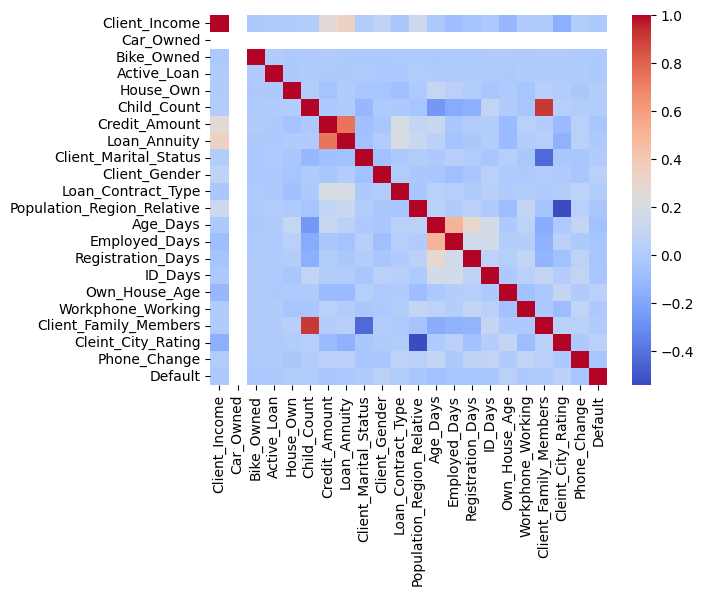

In [140]:
import seaborn as sns
sns.heatmap(all_correlations, cmap='coolwarm')

In [141]:
data2.pop("Car_Owned")
data2.pop("Child_Count")
data2.pop("Client_Marital_Status")
data2.pop("Population_Region_Relative")
data2.pop("Cleint_City_Rating")

ID
12133385    1.0
12128086    2.0
12105180    3.0
12141963    1.0
12190554    2.0
           ... 
12102990    2.0
12164225    2.0
12110723    2.0
12170623    2.0
12105610    3.0
Name: Cleint_City_Rating, Length: 25169, dtype: float64

In [142]:
data2.columns

Index(['Client_Income', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Credit_Amount', 'Loan_Annuity', 'Client_Gender', 'Loan_Contract_Type',
       'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days',
       'Own_House_Age', 'Workphone_Working', 'Client_Family_Members',
       'Phone_Change', 'Default'],
      dtype='object')

In [143]:

input_subset = ['Client_Income', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Credit_Amount', 'Loan_Annuity', 'Client_Gender', 'Loan_Contract_Type',
       'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days',
       'Own_House_Age', 'Workphone_Working', 'Client_Family_Members',
       'Phone_Change']

label_column = ['Default']

x = data2.loc[:, input_subset]
y = data2.loc[:, label_column]

In [144]:
x.head()

,Client_Income,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Phone_Change
ID,,,,,,,,,,,,,,,,
12133385,33750.0,0.0,1.0,0.0,133988.40,3547.35,2,1,11366.0,2977.0,5516.0,4043.0,6.0,0,4.0,674.0
12128086,15750.0,1.0,0.0,1.0,128835.00,3779.55,1,1,21323.0,365243.0,113.0,4855.0,10.0,0,1.0,0.0
12105180,45000.0,0.0,0.0,1.0,105493.50,4482.45,2,1,15568.0,3062.0,1145.0,4739.0,10.0,0,3.0,713.0
12141963,27000.0,0.0,1.0,0.0,38053.35,3064.05,1,1,17639.0,4624.0,849.0,1169.0,2.0,0,2.0,1281.0
12190554,19350.0,0.0,1.0,0.0,111384.00,4732.20,1,1,22727.0,6145.0,7682.0,4850.0,7.0,0,2.0,0.0


In [145]:
y.head() # indexes of values from x and y should match!

,Default
ID,
12133385,0
12128086,0
12105180,0
12141963,0
12190554,0


In [146]:
y.tail()

,Default
ID,
12102990,0
12164225,0
12110723,0
12170623,0
12105610,0


In [147]:
# we should split the data between training and scoring
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [148]:
xtrain.head()

,Client_Income,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Phone_Change
ID,,,,,,,,,,,,,,,,
12142279,11250.0,1.0,1.0,1.0,28440.0,2074.05,2,1,9282.0,809.0,1958.0,1958.0,7.0,0,1.0,1321.0
12199598,36000.0,1.0,1.0,0.0,67950.0,3083.40,2,1,14971.0,4105.0,9068.0,4121.0,3.0,1,2.0,522.0
12175660,9900.0,0.0,0.0,1.0,90000.0,2644.65,1,1,19967.0,836.0,10319.0,3301.0,35.0,0,2.0,658.0
12154699,12150.0,0.0,1.0,1.0,92250.0,2710.35,2,1,17168.0,4361.0,2854.0,714.0,7.0,0,4.0,2800.0
12168442,15750.0,0.0,0.0,0.0,34337.7,1791.00,1,1,17972.0,915.0,9118.0,1193.0,9.0,0,2.0,1.0


In [149]:
ytrain.head() # indexes should match xtrain

,Default
ID,
12142279,0
12199598,0
12175660,0
12154699,0
12168442,0


In [150]:
xtest.tail()

,Client_Income,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Phone_Change
ID,,,,,,,,,,,,,,,,
12203124,31050.0,0.0,1.0,0.0,81000.00,2612.7,1,1,19391.0,1573.0,6940.0,2946.0,9.0,1,2.0,2649.0
12201151,13500.0,0.0,0.0,0.0,70484.40,5171.4,1,1,12107.0,4397.0,2926.0,3523.0,13.0,1,2.0,0.0
12177657,22500.0,0.0,0.0,1.0,48117.60,2469.6,2,1,12796.0,1965.0,224.0,2250.0,10.0,0,2.0,0.0
12102719,22500.0,1.0,1.0,0.0,85208.85,3170.7,1,1,14951.0,2722.0,20.0,2194.0,1.0,0,2.0,2.0
12166324,9000.0,1.0,1.0,1.0,27000.00,1350.0,0,0,9397.0,753.0,375.0,395.0,7.0,0,2.0,368.0


In [151]:
ytest.tail() # indexes should match xtest!

,Default
ID,
12203124,0
12201151,0
12177657,1
12102719,0
12166324,0


In [152]:
# NORMALIZATION -> UNIFORMITY, PERPENDICULAR, SCALING

# MinMax -> min is set to 0, max is set to 1 and all values are scaled between 0 to 1
# min_max_scaled_values = (data -min ) / (max - min)

# Probability data -> 0 to 1, but with p(x) formula instead
# SIGMOID

# between -1 to 1
# TANH

# Z-Score -> where average value is taken into center, and all values are scaled with respect to
# average and standard deviation

# scaled_values = (data - mean) / standard_deviation
# if scaled_value is > 3 or less than -3 then we know it to be outlier

# outlier-> as a ML engineer IGNORE it or as a stats person, set it to MIN or MAX
# or don't even bother, just del those rows!

# for scaling-> calculate mu, sigma, min, max -> ONLY for training data
# then apply same values to the testing data also!


In [153]:
xtrain.describe().T # transpose to convert rows into columns and vice versa

,count,mean,std,min,25%,50%,75%,max
Client_Income,20135.0,19666.955371,17201.831397,2700.0,13500.00,18000.00,22500.0,1800009.0
Bike_Owned,20135.0,0.331314,0.470697,0.0,0.00,0.00,1.0,1.0
Active_Loan,20135.0,0.498237,0.500009,0.0,0.00,0.00,1.0,1.0
House_Own,20135.0,0.687460,0.463540,0.0,0.00,1.00,1.0,1.0
Credit_Amount,20135.0,66590.736705,43540.633029,4500.0,30813.30,55098.00,90000.0,329968.8
Loan_Annuity,20135.0,3017.140914,1604.731861,241.2,1897.65,2751.75,3833.1,22500.0
Client_Gender,20135.0,1.543432,0.536618,0.0,1.00,2.00,2.0,2.0
Loan_Contract_Type,20135.0,0.879960,0.325016,0.0,1.00,1.00,1.0,1.0
Age_Days,20135.0,15234.927042,3969.719790,7697.0,11988.00,14865.00,18183.0,25179.0
Employed_Days,20135.0,36053.821406,105415.747008,2.0,864.00,1895.00,3890.0,365243.0


In [154]:
mu = xtrain.describe().T['mean']
sigma = xtrain.describe().T['std']

In [155]:
xtrain_norm = (xtrain-mu)/sigma
xtest_norm = (xtest - mu)/sigma

In [156]:
xtest_norm.head(10)

,Client_Income,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Phone_Change
ID,,,,,,,,,,,,,,,,
12142646,0.033894,-0.703878,1.003508,-1.483064,-1.295405,-1.447744,0.850825,0.369335,-1.291509,-0.325348,0.044014,-0.118510,-0.937483,-0.617084,-0.365424,-1.189229
12126914,-0.358506,-0.703878,1.003508,0.674246,-0.349964,-0.332511,0.850825,-2.707436,1.092539,-0.316962,-0.611548,0.117552,-0.094625,-0.617084,-0.365424,-1.189229
12150533,-0.227706,1.420629,-0.996455,0.674246,0.266447,0.699718,0.850825,0.369335,1.961366,3.122770,0.572852,0.879599,0.411089,1.620444,0.709338,-1.189229
12106710,1.995895,-0.703878,1.003508,0.674246,0.796021,1.274580,0.850825,-2.707436,1.868412,3.122770,-1.320581,1.230035,-0.853197,1.620444,-0.365424,-1.014451
12192354,-0.750906,-0.703878,1.003508,-1.483064,0.634792,-0.155285,-1.012697,0.369335,0.332032,-0.307704,0.886570,-1.895292,-0.263197,-0.617084,-0.365424,1.093517
12178382,1.472695,-0.703878,-0.996455,0.674246,0.434290,0.783844,-1.012697,-2.707436,1.486521,-0.309867,-0.080546,-0.022756,-0.516054,1.620444,-1.440186,-0.100408
12212948,0.818694,-0.703878,-0.996455,-1.483064,-0.082469,1.166057,-1.012697,0.369335,-0.159439,-0.334559,-0.881994,1.018577,-0.937483,-0.617084,1.784099,0.621143
12189442,-0.227706,-0.703878,-0.996455,0.674246,-0.444200,-0.455616,0.850825,0.369335,-0.712878,-0.292232,-0.792670,1.287887,-0.431768,-0.617084,0.709338,-1.189229
12148674,0.033894,-0.703878,-0.996455,0.674246,0.667576,2.127620,0.850825,0.369335,-0.022653,-0.333848,0.347223,0.727988,0.832518,-0.617084,-0.365424,0.510135


In [157]:
xtrain_norm = xtrain_norm.clip(-3,3)
xtest_norm = xtest_norm.clip(-3,3)

In [158]:
xtest_norm.head(10)

,Client_Income,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Workphone_Working,Client_Family_Members,Phone_Change
ID,,,,,,,,,,,,,,,,
12142646,0.033894,-0.703878,1.003508,-1.483064,-1.295405,-1.447744,0.850825,0.369335,-1.291509,-0.325348,0.044014,-0.118510,-0.937483,-0.617084,-0.365424,-1.189229
12126914,-0.358506,-0.703878,1.003508,0.674246,-0.349964,-0.332511,0.850825,-2.707436,1.092539,-0.316962,-0.611548,0.117552,-0.094625,-0.617084,-0.365424,-1.189229
12150533,-0.227706,1.420629,-0.996455,0.674246,0.266447,0.699718,0.850825,0.369335,1.961366,3.000000,0.572852,0.879599,0.411089,1.620444,0.709338,-1.189229
12106710,1.995895,-0.703878,1.003508,0.674246,0.796021,1.274580,0.850825,-2.707436,1.868412,3.000000,-1.320581,1.230035,-0.853197,1.620444,-0.365424,-1.014451
12192354,-0.750906,-0.703878,1.003508,-1.483064,0.634792,-0.155285,-1.012697,0.369335,0.332032,-0.307704,0.886570,-1.895292,-0.263197,-0.617084,-0.365424,1.093517
12178382,1.472695,-0.703878,-0.996455,0.674246,0.434290,0.783844,-1.012697,-2.707436,1.486521,-0.309867,-0.080546,-0.022756,-0.516054,1.620444,-1.440186,-0.100408
12212948,0.818694,-0.703878,-0.996455,-1.483064,-0.082469,1.166057,-1.012697,0.369335,-0.159439,-0.334559,-0.881994,1.018577,-0.937483,-0.617084,1.784099,0.621143
12189442,-0.227706,-0.703878,-0.996455,0.674246,-0.444200,-0.455616,0.850825,0.369335,-0.712878,-0.292232,-0.792670,1.287887,-0.431768,-0.617084,0.709338,-1.189229
12148674,0.033894,-0.703878,-0.996455,0.674246,0.667576,2.127620,0.850825,0.369335,-0.022653,-0.333848,0.347223,0.727988,0.832518,-0.617084,-0.365424,0.510135


In [159]:
# we can try out multiple algorithms and tunings of those multiple algos

# tuning -> Hyperparameter tuning -> fluctuating the factors from developer's end to generate
# multiple models based on same algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [161]:
mymodels = {
    'DecisionTreeDefault': DecisionTreeClassifier(),
    'DecisionTree200' : DecisionTreeClassifier(max_depth=200),
    'DecisionTree100' : DecisionTreeClassifier(max_depth=100),
    'RandomForestDefault': RandomForestClassifier(),
    'RF-200' : RandomForestClassifier(n_estimators=200),
    'RF-100' : RandomForestClassifier(n_estimators=100),
    'RF-500' : RandomForestClassifier(n_estimators=500),
    'KNN-5' : KNeighborsClassifier(n_neighbors=5),
    'KNN-10' : KNeighborsClassifier(n_neighbors=10),
    'KNN-15' : KNeighborsClassifier(n_neighbors=15),
    'Logistic Regression' : LogisticRegression(),
    'SVM' : SVC(),
    'Naive Bayes' : GaussianNB(),
    'SGD' : SGDClassifier()
}

In [162]:
best_algo_acc = { 'No Algo': None}
best_acc = 0.0
best_algo_precision = { 'No Algo': None}
best_precision = 0.0
best_algo_recall = { 'No Algo': None}
best_recall = 0.0
best_algo_f1score = { 'No Algo': None}
best_f1_score = 0.0


In [163]:
for algoname, algo in mymodels.items():
  algo.fit(xtrain_norm, ytrain)
  p = algo.predict(xtest_norm)
  accscore = accuracy_score(p, ytest)
  if accscore > best_acc and accscore != 1.0:
    best_acc = accscore
    best_algo_acc = { algoname : algo}
  prec = precision_score(p, ytest)
  if prec > best_precision and prec != 1.0:
    best_precision = prec
    best_algo_precision = { algoname : algo}
  rec = recall_score(p, ytest)
  if rec > best_recall and rec != 1.0:
    best_recall = rec
    best_algo_recall = { algoname : algo}
  f1 = f1_score(p, ytest)
  if f1 > best_f1_score and f1 != 1.0:
    best_f1_score = f1
    best_algo_f1score = { algoname : algo}


c:\Users\XX569PS\OpenAI24_6_24\env_name\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\XX569PS\OpenAI24_6_24\env_name\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\XX569PS\OpenAI24_6_24\env_name\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\XX569PS\OpenAI24_6_24\env_name\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

In [164]:
print(best_algo_acc), print(best_acc)

{'RandomForestDefault': RandomForestClassifier()}
0.9417957886372665


(None, None)

In [165]:
print(best_algo_precision), print(best_precision)

{'DecisionTree200': DecisionTreeClassifier(max_depth=200)}
0.2215568862275449


(None, None)

In [166]:
print(best_algo_recall), print(best_recall)

{'KNN-5': KNeighborsClassifier()}
0.2608695652173913


(None, None)

In [167]:
print(best_algo_f1score), print(best_f1_score)

{'RandomForestDefault': RandomForestClassifier()}
0.21866666666666668


(None, None)

In [168]:
# why should we normalize

# happiness = f(time, money) = w1*time + w2*money + bias
# weight and bias-> tiny numbers between (-1 to 1)

# min and max of age-> 0 to 100
# min and max of income-> -1billion to 1billion

# in some cases income could become a very large number, or too small
# thus skewing the entire equation in it's favor

# applying normalzation ensures that all columns are in the same scale
# z-score -> [-3,3] with outliers >3 or < -3
# minmax -> [0,1]
# sigmoid -> (0, 1)
# tanh -> (-1, 1)